# Проведение A/B тестирования

Отдел маркетинга крупного интернет-магазина подготовил список гипотез для увеличения выручки. В рамках данного исследования наша задача состоит в приоритезации данных гипотез и анализе результатов A/B теста.

В нашем распоряжении данные о гипотезах и данные результатов A/B теста.

Составим план работ:
1. Приоритезация гипотез  
    1.1. Загрузка данных  
    1.2. Приоритезация по ICE  
    1.3. Приоритезация по RICE  
    1.4. Вывод
2. Анализ A/B теста  
    2.1. Загрузка данных  
    2.2. Визуализация данных  
    2.3. Подсчет результатов  
    2.4. Вывод

Приступим к исследованию!

## Приоритезация гипотез

### Загрузка данных

Для начала импортируем нужные библиотеки.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import datetime as dt

Теперь загрузим данные о гипотезах в переменную `hypothesis` и изучим основную информацию о них.

In [2]:
try:
    hypothesis = pd.read_csv('/Users/macbook/practicum/projects/online_shop_project/hypothesis.csv')
except:
    hypothesis = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')

In [3]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Датафрейм содержит информацию о 9 гипотезах и их характеристиках.

Согласно документации к данным столбцы содержат следующие данные:
* `Hypothesis` - краткое описание гипотезы
* `Reach` - охват пользователей по 10-балльной шкале
* `Impact` - влияние на пользователей по 10-балльной шкале
* `Confidence` - уверенность в гипотезе по 10-балльной шкале
* `Efforts` - затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы

### Приоритезация по ICE

Применим фреймворк ICE для приоритизации гипотез.

In [4]:
hypothesis['ICE'] = (hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']
hypothesis['ICE'] = hypothesis['ICE'].round(2)

hypothesis[['Hypothesis','ICE']].sort_values(by='ICE', ascending=False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день...",16.20
0,"Добавить два новых канала привлечения трафика,...",13.33
7,Добавить форму подписки на все основные страни...,11.20
6,Показать на главной странице баннеры с актуаль...,8.00
2,Добавить блоки рекомендаций товаров на сайт ин...,7.00
1,"Запустить собственную службу доставки, что сок...",2.00
5,"Добавить страницу отзывов клиентов о магазине,...",1.33
3,"Изменить структура категорий, что увеличит кон...",1.12
4,"Изменить цвет фона главной страницы, чтобы уве...",1.00


Наиболее приоритетными согласно фреймворку ICE стали гипотезы о запуске акции, добавлении двух новых каналов привлечения трафика и добавлении формы подписки на все основные страницы.

### Приоритезация по RICE

Применим фреймворк RICE для приоритизации гипотез.

In [5]:
hypothesis['RICE'] = (hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']
hypothesis['RICE'] = hypothesis['RICE'].round(2)

hypothesis[['Hypothesis','RICE']].sort_values(by='RICE', ascending=False)

,Hypothesis,RICE
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


Наиболее приоритетной согласно фреймворку RICE стала гипотеза о добавлении формы подписки на все основные страницы. Также можно отметить гипотезы о добавлении блоков рекомендаций товаров на сайт, добавлении двух новых каналов привлечения трафика и показ баннеров на главной странице.

### Вывод

Мы видим, что при использовании разных фреймворков меняется приоритизация гипотез. Это связано с тем, что, в отличие от ICE, RICE учитывает не только влияние на пользователей, уверенность в гипотезе и затраты ресурсов на проверку гипотезы, но и охват пользователей.


После применения обоих фреймворков, мы остановили свой выбор на гипотезах о добавлении формы подписки на все основные страницы и добавлении двух новых каналов привлечения трафика, так как данные гипотезы попали в топ-3 приоритетов по каждому фреймфорку.

## Анализ A/B-теста

Мы провели A/B-тест и получили результаты. Приступим к анализу.

### Загрузка данных

Загрузим данные в соответствующие переменные и изучим основную информацию о них.

#### Заказы

In [6]:
try:
    orders = pd.read_csv('/Users/macbook/practicum/projects/online_shop_project/orders.csv')
except:
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')

In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


Датафрейм содержит информацию о более чем тысяче заказов в разрезе по датам и группам A/B теста.

Согласно документации к данным столбцы содержат следующие данные:
* `transactionId` - идентификатор заказа
* `visitorId` - идентификатор пользователя, совершившего заказ
* `date` - дата, когда был совершён заказ
* `revenue` - выручка заказа
* `group` - группа A/B теста, в которую попал заказ

Приведем дату к соответствующему формату.

In [8]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

Проверим датафрейм на наличие дубликатов.

In [9]:
orders.duplicated().sum()

0

В датафрейме дубликатов нет.

#### Пользователи

In [10]:
try:
    visitors = pd.read_csv('/Users/macbook/practicum/projects/online_shop_project/visitors.csv')
except:
    visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')

In [11]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Датафрейм содержит информацию о количестве посетителей в разрезе по датам и группам A/B теста.

Согласно документации к данным столбцы содержат следующие данные:
* `date` - дата
* `group` - группа A/B-теста
* `visitors` - количество пользователей в указанную дату в указанной группе A/B теста

Приведем дату к соответствующему формату.

In [12]:
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

Проверим датафрейм на наличие дубликатов.

In [13]:
visitors.duplicated().sum()

0

В датафрейме дубликатов нет.

### Визуализация данных

#### Кумулятивная выручка по группам

Построим график кумулятивной выручки по группам.

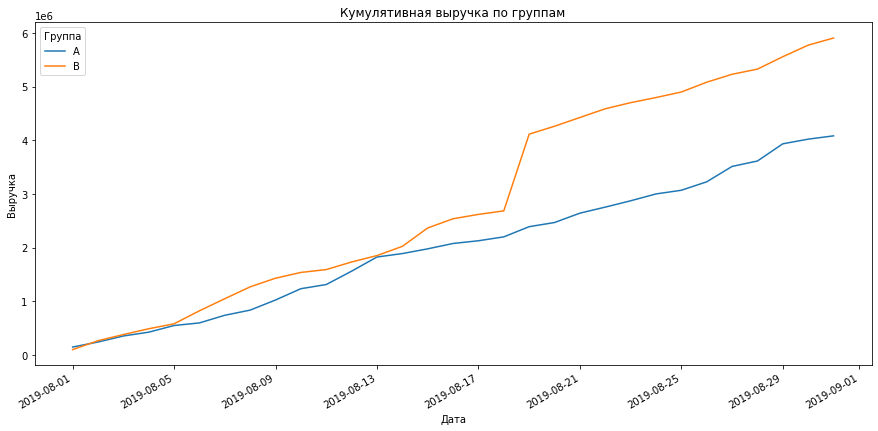

In [14]:
# создадим массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получим агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg(
        {'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1
).sort_values(by=['date','group'])

# получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg(
        {'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1
).sort_values(by=['date','group'])

# объединим кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

# выделим датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# выделим датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# посторим график кумулятивной выручки по группам
plt.figure(figsize=[15, 7])
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('Кумулятивная выручка по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.legend(title='Группа')
plt.gcf().autofmt_xdate()
plt.show()

Выручка групп A и B растет равномерно в течение всего теста, но при этом выручка группы B получила дополнительный скачек в середине теста. Это может быть связано с всплеском количества заказов или с появлением очень дорогих заказов.

Также на протяжении всего теста выручка группы B превышает выручку группы A.

#### Кумулятивный средний чек по группам

Построим график кумулятивного среднего чека по группам.

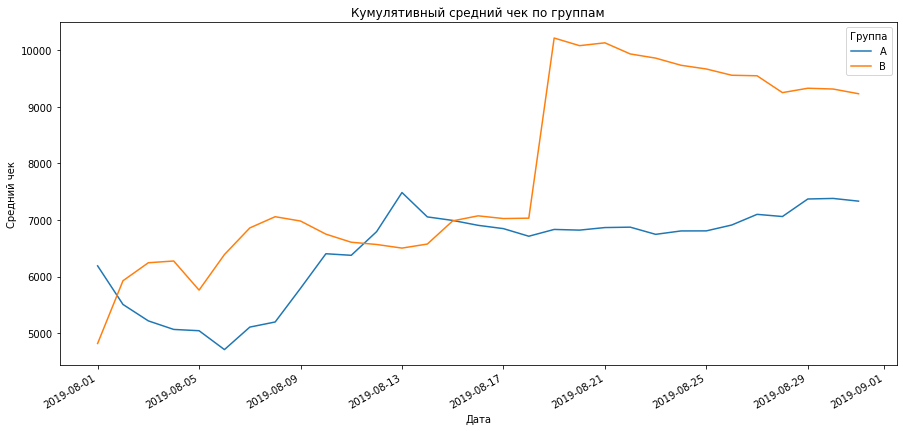

In [15]:
# посторим график кумулятивного среднего чека по группам
plt.figure(figsize=[15, 7])
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('Кумулятивный средний чек по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.legend(title='Группа')
plt.gcf().autofmt_xdate()
plt.show()

Средний чек группы A становится равномерным к середине теста, а средний чек группы B также демонстрирует резкий всплеск в середине теста, после чего начинает постепенно снижаться. Скорее всего этот скачек связан с оформлением особенно дорогих заказов.

При этом практически на протяжении всего теста средний чек группы B превышает средний чек группы A.

#### Относительное изменение кумулятивного среднего чека группы B к группе A

Построим график относительного изменения кумулятивного среднего чека группы B к группе A.

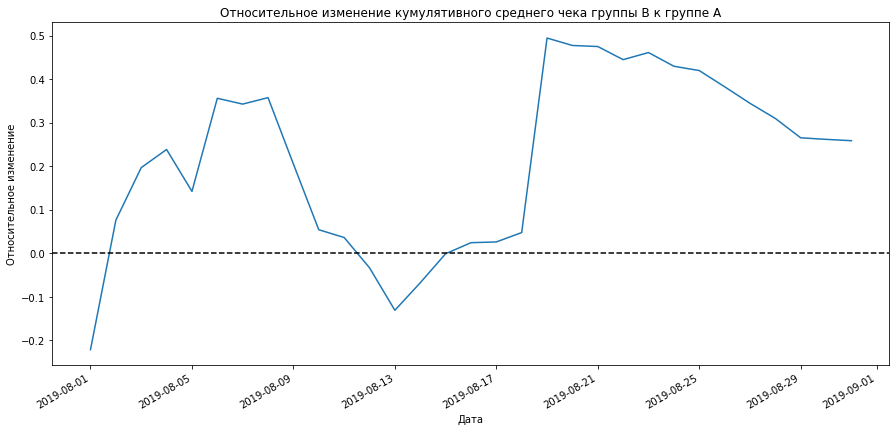

In [16]:
# собирем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# посторим график относительного изменения кумулятивного среднего чека группы B к группе A
plt.figure(figsize=[15, 7])
plt.plot(mergedCumulativeRevenue['date'],
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение')
plt.gcf().autofmt_xdate()
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

Практически на протяжении всего теста средний чек группы B растет относительно группы A, однако данные не стабильны и имеют тенденцию к понижению.

#### Кумулятивное среднее количество заказов на посетителя по группам

Построим график кумулятивного среднего количества заказов на посетителя по группам.

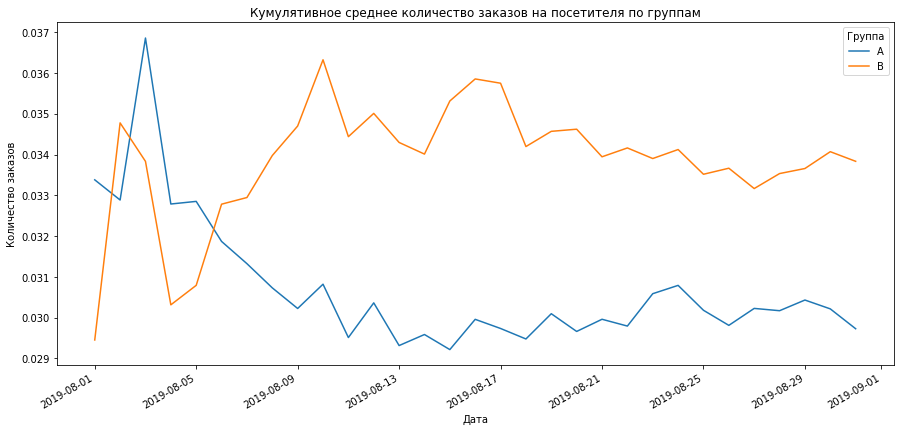

In [17]:
# посчитаем среднее количество заказов на посетителя
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделим данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделим данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# посторим график кумулятивного среднего количества заказов на посетителя по группам
plt.figure(figsize=[15, 7])
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('Кумулятивное среднее количество заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Количество заказов')
plt.legend(title='Группа')
plt.gcf().autofmt_xdate()
plt.show()

Среднее количество заказов стабилизировалось для обеих групп, причем этот показатель у группы B стабильно выше, чем у группы A.

#### Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A

Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

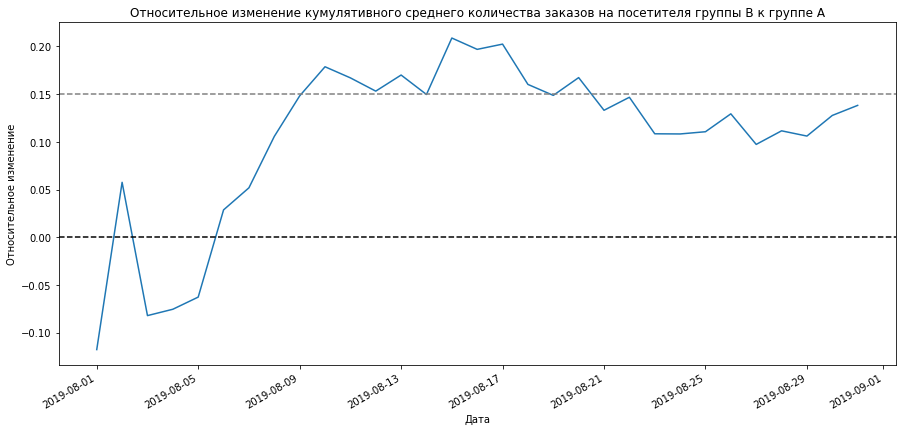

In [18]:
# объединим данные с кумулятивным средним чеком по группам
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(
    cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# посторим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A
plt.figure(figsize=[15, 7])
plt.plot(mergedCumulativeConversions['date'],
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.title('Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение')
plt.gcf().autofmt_xdate()
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.show()

Среднее количество заказов группы B также превышает этот показатель у группы A на протяжении практически всего теста. Разница стабилизируется к концу теста около значения в 15%.

#### Количество заказов по пользователям

Построим точечный график количества заказов по пользователям.

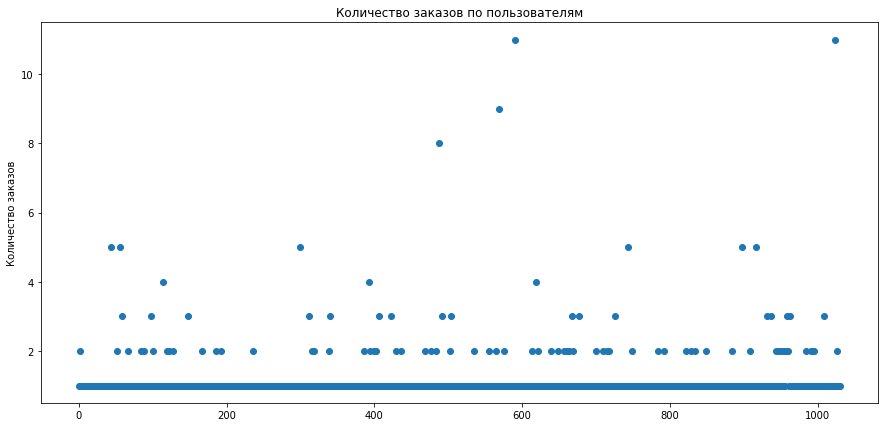

In [19]:
# агрегируем данные заказов по пользователям
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['visitorId', 'orders']

# соберем данные для подписи графика
x_values = pd.Series(range(0,len(ordersByUsers)))

# построим точечный график количества заказов по пользователям
plt.figure(figsize=[15, 7])
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Количество заказов по пользователям')
plt.ylabel('Количество заказов')
plt.show()

Подавляющая часть пользователей совершает не более двух заказов.

Однако, чтобы получить более точные данные, необходимо рассчитать 95-й и 99-й перцентили.

In [20]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

5% пользователей соверщают более двух заказов и 1% - более четырех.

Для нашего анализа выберем границу аномальных значений в 2 заказа на пользователя.

#### Стоимость заказов

Построим точечный график стоимостей заказов.

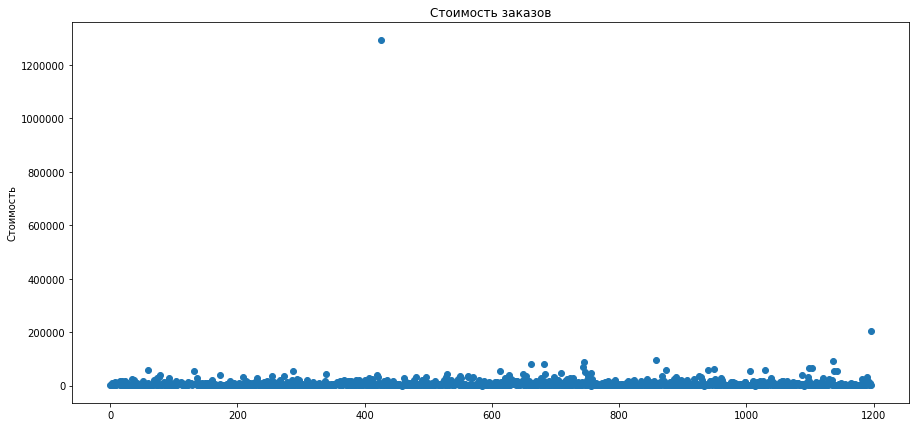

In [21]:
# соберем данные для подписи графика
x_values = pd.Series(range(0,len(orders['revenue'])))

# построим точечный график стоимости заказов
plt.figure(figsize=[15, 7])
plt.scatter(x_values, orders['revenue'])
plt.ticklabel_format(style='plain')
plt.title('Стоимость заказов')
plt.ylabel('Стоимость')
plt.show()

Рассмотрим поближе значения в пределах стоимости в 100 тысяч, чтобы явного выброса не было видно, а мы могли рассмотреть основную часть заказов.

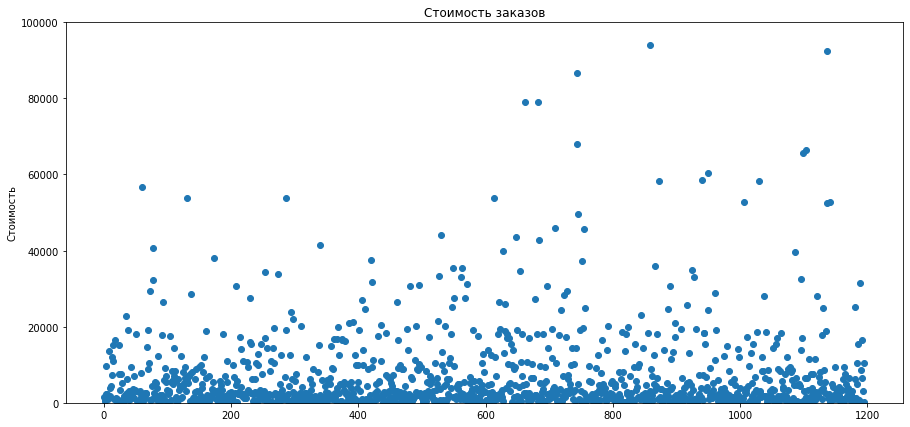

In [22]:
# построим точечный график стоимости заказов
plt.figure(figsize=[15, 7])
plt.scatter(x_values, orders['revenue'])
plt.ylim(0, 100000)
plt.title('Стоимость заказов')
plt.ylabel('Стоимость')
plt.show()

Большая часть заказов не превышает среднюю стоимость в 40 тысяч.

Однако, чтобы получить более точные данные, необходимо рассчитать 95-й и 99-й перцентили.

In [23]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

5% заказов превышают стоимость в 28 тысяч и 1% - 58 тысяч.

Для нашего анализа выберем границу аномальных значений в 28 тысяч.

### Подсчет результатов

Установим уровень статистической значимости в 5% для анализа результатов.

In [24]:
alpha = 0.05

#### Различия в среднем количестве заказов на посетителя между группами 

Сформируем нулевую и альтернативную гипотезы:  
H0: Статистически значимых различий в среднем числе заказов между группами нет.  
H1: Статистически значимые различия в среднем количестве заказов между группами есть.

Для проверки гипотез будем использовать тест Уилкоксона-Манна-Уитни, так как в данных присутствуют значительные аномалии.

##### Сырые данные

Рассчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по сырым данным.

In [25]:
# сформируем переменные с количеством заказов для пользователей, совершивших покупки, по группам
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']



# cформируем переменные, в которых каждому пользователю будет соответствовать количество заказов, по группам
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group']=='A']['visitors'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group']=='B']['visitors'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

# рассчитаем p-value при помощи теста Уилкоксона-Манна-Уитни
print('p-value:', "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

# рассчитаем разницу в среднем количестве заказов на посетителя между группами
print('разница:', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value: 0.017
разница: 0.138


p-value ниже уровня статистической значимости, значит, нулевую гипотезу отвергаем. В связи с этим мы можем сделать вывод о том, что есть достаточно статистических оснований полагать, что среднее количество заказов на посетителя между группами различается.

Тест также показал, что среднее количество заказов на посетителя в группе B на 13,8% больше, чем в группе A.

##### Очищенные данные

Рассчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по очищенным данным, то есть без учета аномалий.

In [26]:
# сделаем срез пользователей с числом заказов больше 2
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsers['orders'], 95)]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsers['orders'], 95)]['visitorId'],
    ],
    axis=0,
)

# сделаем срез пользователей, совершивших заказы дороже 28 000
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], 95)]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

# cформируем переменные, в которых каждому пользователю будет соответствовать количество заказов, по группам
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group']=='A']['visitors'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group']=='B']['visitors'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

# рассчитаем p-value при помощи теста Уилкоксона-Манна-Уитни
print('p-value:', '{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))

# рассчитаем разницу в среднем количестве заказов на посетителя между группами
print('разница:', '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value: 0.013
разница: 0.173


p-value также ниже уровня статистической значимости, значит, нулевую гипотезу отвергаем. Следовательно мы можем сделать тот же вывод о том, что есть достаточно статистических оснований полагать, что среднее количество заказов на посетителя между группами различается.

В данном случае среднее количество заказов на посетителя в группе B на 17,3% больше, чем в группе A.

#### Различия в среднем чеке заказа между группами 

Сформируем нулевую и альтернативную гипотезы:  
H0: Статистически значимых различий в среднем чеке заказа между группами нет.  
H1: Статистически значимые различия в среднем чеке заказа между группами есть.

Для проверки гипотез будем использовать тест Уилкоксона-Манна-Уитни, так как в данных присутствуют значительные аномалии.

##### Сырые данные

Рассчитаем статистическую значимость различий в среднем чеке заказа между группами по сырым данным.

In [27]:
# рассчитаем p-value при помощи теста Уилкоксона-Манна-Уитни
print('p-value:', '{0:.3f}'.format(
    stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))

# рассчитаем разницу в среднем чеке заказа между группами
print('разница:', '{0:.3f}'.format(
    orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value: 0.729
разница: 0.259


Не смотря то, что средний чек в группе B на 25% выше, чем в группе A, p-value превышает уровень статистической значимости, а значит, нулевую гипотезу не отвергаем. Соответсвенно, нет статистических оснований полагать, что есть различия в среднем чеке между группами.

##### Очищенные данные

Рассчитаем статистическую значимость различий в среднем чеке заказа между группами по очищенным данным, то есть без учета аномалий.

In [28]:
# рассчитаем p-value при помощи теста Уилкоксона-Манна-Уитни
print('p-value:', '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

# рассчитаем разницу в среднем чеке заказа между группами
print('разница:', "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value: 0.738
разница: -0.020


p-value также выше уровня статистической значимости, следовательно нулевую гипотезу не отвергаем. В данном случае мы можем также сделать вывод о том, что нет статистических оснований полагать, что есть различия в среднем чеке между группами.

### Вывод

Проведя A/B тест мы выяснили, что есть статистически значимое различие по среднему количеству заказов на посетителя между группами как по сырым данным, так и после фильтрации аномалий. При этом, нет статистически значимого различия по среднему чеку между группами ни по сырым, ни по очищенным данным.

На графике относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A видно, что результаты группы B лучше группы A и что это показатель стабилизировался к окончанию теста.
А вот график относительного изменения кумулятивного среднего чека группы B к группе A не стабилен, хотя и показывает, что результаты группы B также превосходят резуьтаты группы A на протяжении практически всего теста.

Исходя из приведенных выше выводов, мы принимаем решение остановить тест и признать, что группа B показала результаты, превосходящие результаты группы A. И, следовательно, мы рекомендуем применить протестированную гипотезу.